In [19]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [3]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [4]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [5]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june = session.query(Measurement.date, Measurement.tobs).\
filter(extract('month',Measurement.date) ==6).all()

In [6]:
#  3. Convert the June temperatures to a list.
june_temps = list((june))

In [7]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(june_temps,columns=['date','June Temps'])
june_df.set_index(june_df['date'], inplace=True)

In [8]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [9]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
december = session.query(Measurement.date, Measurement.tobs).\
filter(extract('month',Measurement.date) ==12).all()

In [10]:
# 7. Convert the December temperatures to a list.
december_temps = list((december))

In [11]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_df = pd.DataFrame(december_temps,columns=['date','December Temps'])
dec_df.set_index(dec_df['date'], inplace=True)

In [12]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


## D3: Two additional queries

In [16]:
june = session.query(Measurement.date, Measurement.prcp).\
filter(extract('month',Measurement.date) ==6).all()
june_prcp = list((june))
june_df_p = pd.DataFrame(june_prcp,columns=['date','June Precipitation'])
june_df_p.set_index(june_df_p['date'], inplace=True)
june_df_p.describe()

,June Precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [17]:
december = session.query(Measurement.date, Measurement.prcp).\
filter(extract('month',Measurement.date) ==12).all()
december_prcp = list((december))
december_df_p = pd.DataFrame(december_prcp,columns=['date','December Precipitation'])
december_df_p.set_index(december_df_p['date'], inplace=True)
december_df_p.describe()

,December Precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


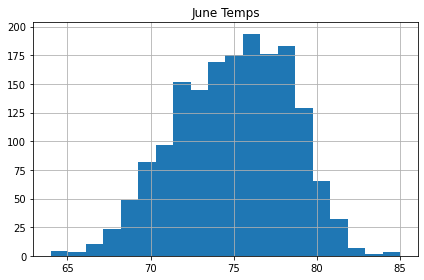

In [21]:
june_df.hist(bins=20)
plt.tight_layout()

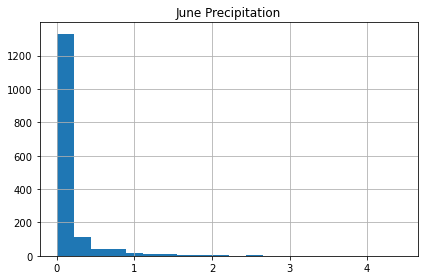

In [22]:
june_df_p.hist(bins=20)
plt.tight_layout()

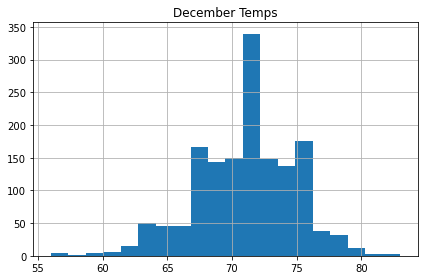

In [24]:
dec_df.hist(bins=20)
plt.tight_layout()

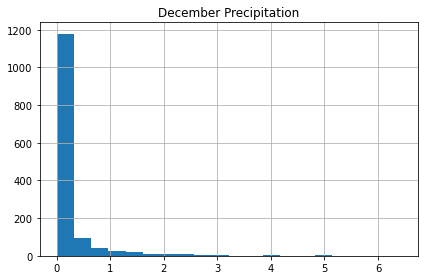

In [25]:
december_df_p.hist(bins=20)
plt.tight_layout()